# Analyzing Employees Exit Surveys

This project will aim to analyze employees exit surveys. Data comes from exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

The analysis will aim to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [395]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data

In [396]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [397]:
print(dete_survey.info())
print('\n')
print(dete_survey.head())
print('\n')
print(dete_survey.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In the DETE survey, there are 822 rows and 56 columns. Some of the columns have majority null values - for example, Business Unit, Aboriginal, Torres Strait, South Sea, Disability, NESB. 

In [398]:
print(tafe_survey.info())
print('\n')
print(tafe_survey.head())
print('\n')
print(tafe_survey.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In the TAFE survey, there are 702 rows and 72 columns. There are much fewer null values in this dataframe.

In [399]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [400]:
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [401]:
print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [402]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [403]:
mapping = {'Record ID': 'id',
        'CESSATION YEAR': 'cease_date',
        'Reason for ceasing employment': 'separationtype',
        'Gender. What is your Gender?': 'gender',
        'CurrentAge. Current Age': 'age',
        'Employment Type. Employment Type': 'employment_status',
        'Classification. Classification': 'position',
        'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
        'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


In [404]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [405]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [406]:
dete_resignations = dete_survey_updated.copy()[(dete_survey_updated['separationtype']=='Resignation-Other reasons')|(dete_survey_updated['separationtype']=='Resignation-Other employer')|(dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')]
print(dete_resignations.info())
print(dete_resignations.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [407]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype']=='Resignation']
print(tafe_resignations.info())
print(tafe_resignations.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

In [408]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [409]:
dete_resignations['cease_date1'] = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})')
dete_resignations['cease_date1'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date1, dtype: int64

In [410]:
dete_resignations['cease_date1'] = dete_resignations['cease_date1'].astype(float)
dete_resignations['cease_date1'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date1, dtype: int64

In [411]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [412]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Values look ok.

In [413]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [414]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,cease_date1
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,2012.0
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,2012.0
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,2012.0
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,2012.0
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,2012.0


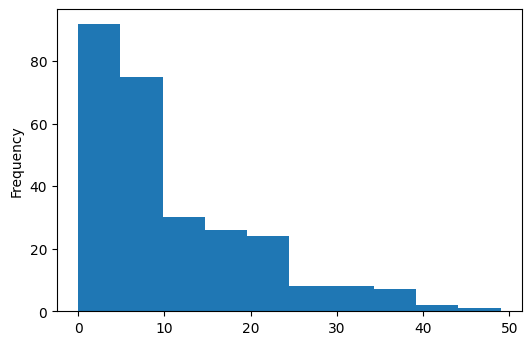

In [415]:
%matplotlib inline
dete_resignations['institute_service'] = dete_resignations['cease_date1'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts().sort_index()
dete_resignations['institute_service'].plot(kind='hist')
plt.show()

In [416]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [417]:
# checking TAFE

tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

In [418]:
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan 
    else:
        return True

tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

In [419]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [420]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
print('\n')
print(tafe_resignations['dissatisfied'].value_counts())



False    241
True      91
Name: dissatisfied, dtype: int64


In [421]:
print(dete_resignations['job_dissatisfaction'].value_counts())
print('\n')
print(dete_resignations['dissatisfaction_with_the_department'].value_counts())
print('\n')
print(dete_resignations['physical_work_environment'].value_counts())
print('\n')
print(dete_resignations['lack_of_recognition'].value_counts())
print('\n')
print(dete_resignations['lack_of_job_security'].value_counts())
print('\n')
print(dete_resignations['work_location'].value_counts())
print('\n')
print(dete_resignations['employment_conditions'].value_counts())
print('\n')
print(dete_resignations['work_life_balance'].value_counts())
print('\n')
print(dete_resignations['workload'].value_counts())

False    270
True      41
Name: job_dissatisfaction, dtype: int64


False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64


False    305
True       6
Name: physical_work_environment, dtype: int64


False    278
True      33
Name: lack_of_recognition, dtype: int64


False    297
True      14
Name: lack_of_job_security, dtype: int64


False    293
True      18
Name: work_location, dtype: int64


False    288
True      23
Name: employment_conditions, dtype: int64


False    243
True      68
Name: work_life_balance, dtype: int64


False    284
True      27
Name: workload, dtype: int64


In [422]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(axis=1, skipna=False)
print('\n')
print(dete_resignations['dissatisfied'].value_counts())



False    162
True     149
Name: dissatisfied, dtype: int64


In [423]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

In [424]:
print(dete_resignations.info())
print('\n')
print(tafe_resignations.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [425]:
combined = pd.concat([dete_resignations, tafe_resignations])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    object 
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [426]:
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [427]:
combined_updated = combined.dropna(axis=1, thresh=500)

In [428]:
combined_updated.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          8
institute             0
dtype: int64

In [429]:
print(combined_updated['institute_service'].value_counts())

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [430]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [431]:
combined_updated['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
10.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
26.0                   2
30.0                   2
36.0                   2
28.0                   2
25.0                   2


In [432]:
combined_updated['institute_service_new'] = combined_updated['institute_service'].str.replace('Less than 1 year','1').str.replace('More than 20 years','20').str.replace('11-20','11').str.replace('3-4','3').str.replace('5-6','5').str.replace('7-10','7')
combined_updated['institute_service_new'] = combined_updated['institute_service_new'].str.replace('1-2','1')
combined_updated['institute_service_new'].value_counts()

1       137
nan      88
3        63
5        33
11       26
5.0      23
1.0      22
7        21
3.0      20
0.0      20
6.0      17
4.0      16
9.0      14
2.0      14
7.0      13
20       10
8.0       8
13.0      8
15.0      7
20.0      7
17.0      6
10.0      6
14.0      6
12.0      6
22.0      6
16.0      5
18.0      5
23.0      4
11.0      4
24.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
31.0      1
33.0      1
38.0      1
27.0      1
35.0      1
29.0      1
34.0      1
42.0      1
41.0      1
49.0      1
Name: institute_service_new, dtype: int64

In [433]:
combined_updated['institute_service_new'] = combined_updated['institute_service_new'].astype(float)

In [434]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     651 non-null    float64
 1   separationtype         651 non-null    object 
 2   cease_date             635 non-null    object 
 3   position               598 non-null    object 
 4   employment_status      597 non-null    object 
 5   gender                 592 non-null    object 
 6   age                    596 non-null    object 
 7   institute_service      651 non-null    object 
 8   dissatisfied           643 non-null    object 
 9   institute              651 non-null    object 
 10  institute_service_new  563 non-null    float64
dtypes: float64(2), object(9)
memory usage: 61.0+ KB


Creating a mapping function:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [442]:
def map_years(val):
    if val < 3:
        return "A: New: Less than 3 years at a company"
    elif val < 7:
        return "B: Experienced: 3-6 years at a company"
    elif val < 10:
        return "C: Established: 7-10 years at a company"
    else:
        return "D: Veteran"

combined_updated['service_cat'] = combined_updated['institute_service_new'].apply(map_years)
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_new,service_cat
3,4.0,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,7.0,C: Established: 7-10 years at a company
5,6.0,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,18.0,D: Veteran
8,9.0,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,3.0,B: Experienced: 3-6 years at a company
9,10.0,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,15.0,D: Veteran
11,12.0,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,3.0,B: Experienced: 3-6 years at a company


In [443]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [444]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [445]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [449]:
pivot = combined_updated.pivot_table(['dissatisfied'],['service_cat'])

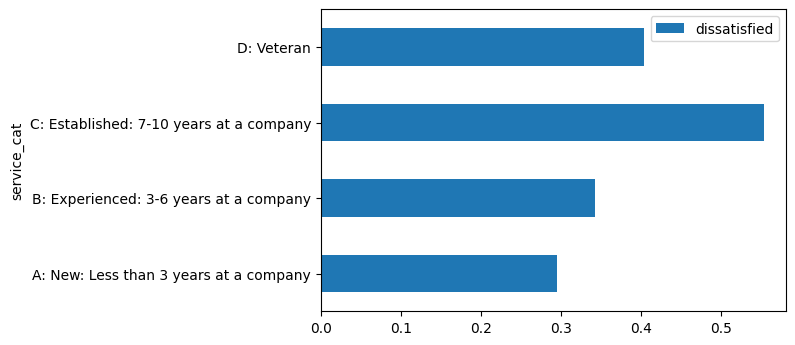

In [450]:
pivot.plot(kind='barh')


Most people have been with the company between 7 and 10 years.